In [56]:
#load stock data
from convertStockToJson import filesInPath, getDataFromFiles

pathToFiles = "2019"

filenames = filesInPath(pathToFiles)
stockPrices = getDataFromFiles(pathToFiles, filenames, None)

In [57]:
import pandas as pd
import numpy as np



In [268]:
order = 5
granularity = 2
possibleStates = 2**order


transitionProbabilities = np.ndarray((possibleStates, possibleStates))
transitionProbabilities[:] = 0

transitionCounts = np.ndarray((possibleStates, possibleStates))
transitionCounts[:] = 0

transitionStateCounts = np.zeros(possibleStates)


print(transitionProbabilities)
print(transitionCounts)



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [269]:
def getState(opens : list, closes : list):
    states = 0
    
    for (open_, close, i) in zip(opens, closes, range(len(opens))):
        s = 1 << i
        if(open_ < close):
            states = states | s
    return states





In [270]:
from convertStockToJson import getJsonDataFromFile

def jsonToDataFrame(stockData):
    opens = []
    highs = []
    lows = []
    closes = []
    volumes = []
    dates = []

    for key in stockData:
        (open_, high, low, close, volume) = stockData[key]
        opens.append(open_)
        highs.append(high)
        lows.append(low)
        closes.append(close)
        volumes.append(volume)
        dates.append(key)

    data = {'Date':dates, 'Open':opens, 'High':highs, 'Low':lows, 'Close':closes, 'Volume': volumes}

    return pd.DataFrame(data=data)



In [284]:
#train markov chain

def trainMarkokChain(df):
    i = 0
    prices = df[i:i+order]
    currentState = getState(prices['Open'], prices['Close'])


    for i in range(1, len(df)):
        prices = df[i:i+order]
        nextState = getState(prices['Open'], prices['Close'])
        transitionCounts[currentState, nextState] += 1
        transitionStateCounts[currentState] += 1
        currentState = nextState


filenames = filesInPath('data')
import random

#random.shuffle(filenames)
#filenames = filenames[:40]

for (fileName,i) in zip(filenames, range(len(filenames))):
    fileName = fileName[:-5]
    print(fileName + ",  " + str(i/len(filenames) * 100 ) + "%")
    modelBasedOnStock = fileName  
    stockData = getJsonDataFromFile(modelBasedOnStock)
    stockDatadf = jsonToDataFrame(stockData)      
    trainMarkokChain(stockDatadf)  
    



print(transitionCounts)
print(transitionStateCounts)




1AD
1AG
1AL
1PG
1ST
3DM
3DP
3PL
4DS
4WD
88E
8CO
8EC
8IH
9SP
A2M
A3D
AAA
AAC
AAD
AAI
AAJ
AAK
AAL
AAP
AAQ
AAR
AAU
AAX
AAY
AB1
ABA
ABC
ABL
ABN
ABP
ABQ
ABT
ABU
ABV
ABW
ABX
ABY
ABZ
ACB
ACG
ACJ
ACK
ACL
ACO
ACP
ACQ
ACR
ACS
ACU
ACW
ACX
AD1
ADA
ADD
ADH
ADJ
ADN
ADO
ADQ
ADR
ADV
ADX
ADY
AEB
AEE
AEF
AEG
AEH
AEI
AEJ
AEK
AEM
AER
AEU
AEV
AFA
AFG
AFI
AFJ
AFP
AFR
AFT
AFV
AFY
AGB
AGD
AGE
AGF
AGG
AGI
AGJ
AGK
AGL
AGO
AGR
AGS
AGX
AGY
AHA
AHC
AHD
AHE
AHF
AHG
AHK
AHL
AHN
AHQ
AHR
AHX
AHY
AHZ
AIA
AIB
AIK
AIO
AIQ
AIR
AIS
AIV
AIW
AIX
AIY
AIZ
AJA
AJC
AJD
AJJ
AJL
AJM
AJQ
AJR
AJX
AJY
AKA
AKF
AKG
AKK
AKM
AKP
AKY
ALA
ALC
ALF
ALI
ALK
ALL
ALQ
ALR
ALT
ALU
ALY
ALZ
AMA
AMB
AMC
AME
AMH
AMI
AML
AMM
AMN
AMO
AMP
AMT
AMU
AMX
ANB
ANG
ANI
ANL
ANN
ANO
ANP
ANQ
ANR
ANW
ANZ
AOA
AOC
AOD
AOF
AOG
AOH
AOK
AOM
AON
AOP
AOU
AOW
APA
APC
APD
APE
APG
API
APK
APL
APN
APO
APP
APW
APX
APY
APZ
AQA
AQC
AQD
AQF
AQG
AQI
AQJ
AQO
AQP
AQQ
AQR
AQS
AQU
AQX
AQZ
AR1
ARA
ARB
ARC
ARD
ARE
ARF
ARG
ARH
ARI
ARM
ARO
ARP
ARS
ARU
ARV
ARW
ARX
ASB
ASG
ASH
ASL
ASN
ASP


In [286]:
i = 40
prices = stockDatadf[i:i+order]
currentState = getState(prices['Open'], prices['Close'])
print(transitionProbabilities[currentState])
correctPriceClose = stockDatadf['Close'][i+order]
correctPriceOpen = stockDatadf['Open'][i+order]

newState = np.argmax( transitionProbabilities[currentState] )
print(transitionProbabilities[currentState][newState])


print(correctPriceOpen)
print(correctPriceClose)
def getLatestState(state: int):
    return state >> (order-1)

print(getLatestState(newState))


[0.         0.         0.         0.         0.         0.
 0.         0.         0.71917304 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.28082696 0.         0.         0.         0.         0.
 0.         0.        ]
0.7191730421071074
12.52
12.58
0


This will now test how well the model does on other stocks

[0.3458333333333333, 0.15306122448979592, 0.14849624060150377, 0.3541666666666667, 0.11956521739130435, 0.16666666666666666, 0.35308056872037913, 0.4468718967229394, 0.29009009009009007, 0.1810344827586207, 0.3220338983050847, 0.2607361963190184, 0.31896551724137934, 0.13282732447817835, 0.2152230971128609, 0.5882352941176471, 0.2271186440677966, 0.2037533512064343, 0.4120819848975189, 0.4045584045584046, 0.285451197053407, 0.15178571428571427, 0.31332357247437775, 0.3773049645390071, 0.25142857142857145, 0.28371278458844135, 0.43043043043043044, 0.4339622641509434, 0.08907563025210084, 0.4685598377281947, 0.32608695652173914, 0.2676991150442478, 0.05333333333333334, 0.3176328502415459, 0.1276595744680851, 0.41273584905660377, 0.04918032786885246, 0.188, 0.10344827586206896, 0.30732292917166865, 0.2721518987341772, 0.3179916317991632, 0.19597989949748743, 0.19476744186046513, 0.4332552693208431, 0.31776765375854216, 0.04, 0.385038503850385, 0.35185185185185186, 0.4867886178861789, 0.30

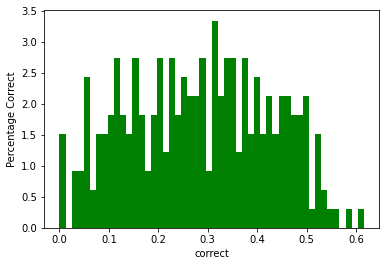

In [325]:
import numpy as np
import matplotlib.pyplot as plt
print(percentageCorrects)


# the histogram of the data
n, bins, patches = plt.hist(percentageCorrects, 50, density=True, facecolor='g')


plt.xlabel('correct')
plt.ylabel('Percentage Correct')
plt.show()

In [289]:

def getDataFromFilesEasy(selectedListings, pathToFiles):
    filenames = filesInPath(pathToFiles)

    return getDataFromFiles(pathToFiles, filenames, selectedListings)


janStockData = getDataFromFilesEasy([modelBasedOnStock], "2020Jan")

janStockDatadf = jsonToDataFrame(janStockData[modelBasedOnStock])

testModel(janStockDatadf, True)



KeyError: 'ZYUS'

In [386]:
order = 5
states = 8


transitionProbabilities = np.ndarray((states, states))
transitionProbabilities[:] = 0

transitionCounts = np.ndarray((states, states))
transitionCounts[:] = 0

transitionStateCounts = np.zeros(states)


In [394]:

stockData = getJsonDataFromFile('VAS')
stockDatadf = jsonToDataFrame(stockData) 

def convertArrayToTimeSeries(array, duration):
    length = len(array) - duration
    subTimeSeries = np.ndarray((length, duration))
    for i in range(length):
        subTimeSeries[i] = closes[i:i+duration]
    return subTimeSeries

subTimeSeries = convertArrayToTimeSeries(stockDatadf['Close'])


SyntaxError: invalid syntax (<ipython-input-394-8742351c4da6>, line 4)

In [388]:
a = np.array([[ 5, 1 ,3], [ 1, 1 ,1], [ 1, 2 ,1]])
b = np.array([1, 2, 3])

print(a*b)

[[5 2 9]
 [1 2 3]
 [1 4 3]]


In [389]:


avg = np.mean(subTimeSeries, axis=1)
var = np.var(subTimeSeries, axis=1)
print(len(var))
print(len(avg))
print(len(subTimeSeries))

subTimeSeriesNorm = np.ndarray(subTimeSeries.shape)
for i in range(len(subTimeSeries)):
    subTimeSeriesNorm[i] = (subTimeSeries[i] - avg[i])/var[i]


print(subTimeSeriesNorm)

1008
1008
1008
[[-2.72003109e+00  7.96580532e+00 -2.91431902e-01  1.89430736e+00
  -6.84864970e+00]
 [ 7.65076508e+00  1.59888104e-13  2.02520252e+00 -6.07560756e+00
  -3.60036004e+00]
 [ 2.96233601e+00  7.72323318e+00 -1.13203555e+01 -5.50148117e+00
   6.13626746e+00]
 ...
 [-4.90675421e+00 -1.58902005e+00  9.42934972e-01  3.38758120e+00
   2.16525808e+00]
 [-3.17981331e+00 -1.32064827e+00  4.74407632e-01 -4.23120320e-01
   4.44917427e+00]
 [-2.51111477e+00 -1.07031121e+00 -1.79071299e+00  2.12003952e+00
   3.25209946e+00]]


[0]


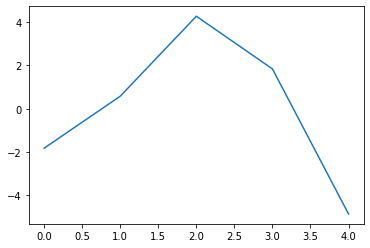

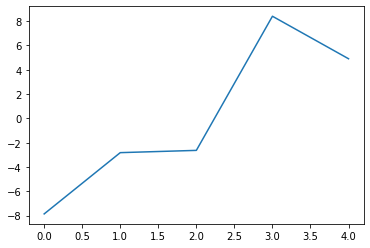

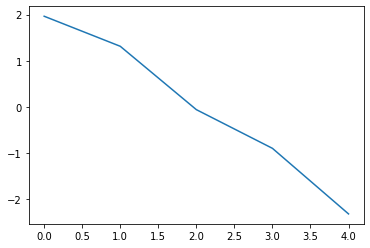

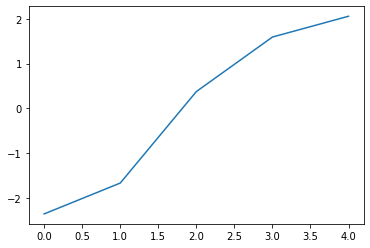

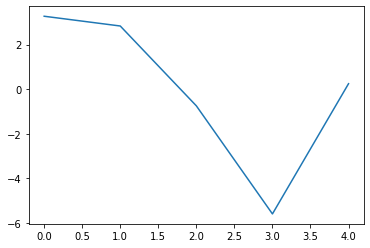

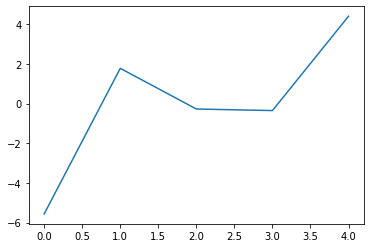

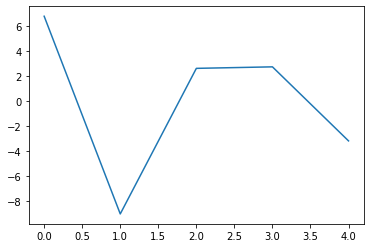

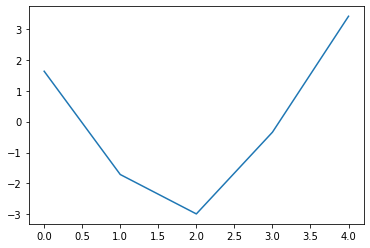

In [390]:
from sklearn.cluster import KMeans
import numpy as np
import numpy as np
import matplotlib.pyplot as plt




kmeans = KMeans(n_clusters=states, random_state=0).fit(subTimeSeriesNorm)

print(kmeans.predict([subTimeSeriesNorm[0]]))


for cluster in kmeans.cluster_centers_:
    plt.plot(cluster)
    plt.show()




In [391]:
print(subTimeSeriesNorm.shape)
subTimeSeriesClassified = kmeans.predict(subTimeSeriesNorm)

(1008, 5)


In [392]:

def trainMarkokChain(subSeriesClassifified):
    for i in range(len(subSeriesClassifified)-1):
        currentState = subSeriesClassifified[i]
        nextState = subSeriesClassifified[i+1]
        
        transitionCounts[currentState, nextState] += 1
        transitionStateCounts[currentState] += 1


trainMarkokChain(subTimeSeriesClassified)


print(transitionCounts)
print(transitionStateCounts)



[[  2.   0.  46.   1.  27.   9.   0.   1.]
 [  9.   3.   0.   9.   0.   3.   1.   1.]
 [  9.   0. 215.  10.  35.   3.   4.  37.]
 [ 46.   6.  14. 211.   0.  43.   0.   2.]
 [  0.   0.  29.   0.   3.   0.   3.  33.]
 [  7.  13.   6.  17.   3.   3.   8.  17.]
 [  7.   0.   2.   0.   0.  11.   0.   0.]
 [  5.   4.   1.  75.   0.   2.   4.   7.]]
[ 86.  26. 313. 322.  68.  74.  20.  98.]


In [393]:
def updateProbabilities():
    for i in range(transitionProbabilities.shape[0]):
        if(transitionStateCounts[i] != 0):
            for j in range(transitionProbabilities.shape[1]):
                transitionProbabilities[i, j] = transitionCounts[i, j]/transitionStateCounts[i]

updateProbabilities()
print(transitionProbabilities)

[[0.02325581 0.         0.53488372 0.01162791 0.31395349 0.10465116
  0.         0.01162791]
 [0.34615385 0.11538462 0.         0.34615385 0.         0.11538462
  0.03846154 0.03846154]
 [0.02875399 0.         0.68690096 0.03194888 0.11182109 0.00958466
  0.01277955 0.11821086]
 [0.14285714 0.01863354 0.04347826 0.6552795  0.         0.13354037
  0.         0.00621118]
 [0.         0.         0.42647059 0.         0.04411765 0.
  0.04411765 0.48529412]
 [0.09459459 0.17567568 0.08108108 0.22972973 0.04054054 0.04054054
  0.10810811 0.22972973]
 [0.35       0.         0.1        0.         0.         0.55
  0.         0.        ]
 [0.05102041 0.04081633 0.01020408 0.76530612 0.         0.02040816
  0.04081633 0.07142857]]
